<a href="https://colab.research.google.com/github/Subarna-kanti/Real-time-Dress-Recognition-Paradigm/blob/master/Dress_Classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version
import keras

Using TensorFlow backend.


/content/drive/My Drive/withoutrandomcrop/save_sarees_900.p
(1085, 49153)
/content/drive/My Drive/withoutrandomcrop/save_kurtis_900.p
(1588, 49153)
/content/drive/My Drive/withoutrandomcrop/save_sarees_910.p
(395, 49153)
/content/drive/My Drive/withoutrandomcrop/save_kurtis_491.p
(501, 49153)
/content/drive/My Drive/withoutrandomcrop/save_tshirts_900.p
(826, 49153)
/content/drive/My Drive/withoutrandomcrop/save_formal_shirts_1200.p
(107, 49153)
/content/drive/My Drive/withoutrandomcrop/save_kurtis_1900.p
(926, 49153)
/content/drive/My Drive/withoutrandomcrop/save_tshirts_1200.p
(279, 49153)
/content/drive/My Drive/withoutrandomcrop/Copy of save_formal_shirts_1164.p
(1565, 49153)
x.shape (7272, 49152)
y.shape (7272,)
Train data shape:    (6972, 128, 128, 3)
Train labels shape:  (6972,)
Test data shape:     (300, 128, 128, 3)
Test labels shape:   (300,)


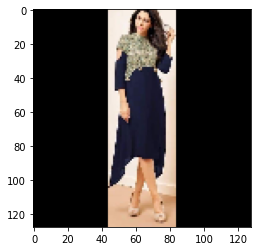

In [ ]:
import pandas as pd
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output
import glob
%matplotlib inline

def do_the_test_train_split(X, y , num_train = 300 , num_val = 9  ):
  X_train = X[:num_train , : , :, : ]
  y_train = y[:num_train]
  X_test = X[num_train: , : , : , : ]
  y_test = y[num_train:  ]
  return X_train, y_train, X_test, y_test

img_rows, img_cols = 256, 256
input_shape = (img_rows, img_cols, 3)

def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_dataset(filedir):
  i = 0
  dataframe = np.array([ ])
  for filepath in glob.glob(filedir):
    print(filepath)
    i += 1
    f =  open(filepath, 'rb') 
    datadict = load_pickle(f)
    print(datadict.shape)
    if dataframe.size == 0 : 
      dataframe = datadict
    else : 
      dataframe = np.concatenate( (dataframe , datadict) , axis = 0 )
  np.random.shuffle(dataframe)
  X = dataframe[: , 1:]
  Y = dataframe[: , 0]
  print("x.shape", X.shape)
  print("y.shape", Y.shape)
  del dataframe
  del datadict
  X = X.reshape(-1,128,128,3).astype("float32")

  return X/255, Y


dirs = '/content/drive/My Drive/withoutrandomcrop/*'
X, y = load_dataset(dirs)
plt.imshow(X[3])

# Invoke the above function to get our data.
x_test, y_test, x_train, y_train = do_the_test_train_split(X, y)

print('Train data shape:   ', x_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape:    ', x_test.shape)
print('Test labels shape:  ', y_test.shape)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse=False)
y_train = np.reshape(y_train, (-1,1))
y_train = enc.fit_transform(y_train)

In [ ]:
y_train.shape

(6972, 4)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


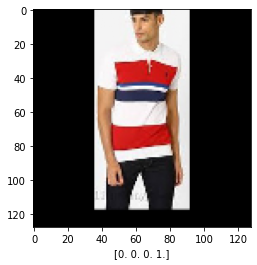

In [ ]:
image = x_train[20]
plt.xlabel(y_train[20])
 
plt.imshow(image)
plt.show()

In [ ]:
# #this cell is crashing due to using us all the RAM 
# datagen = keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     samplewise_center=False,
#     featurewise_std_normalization=True,
#     samplewise_std_normalization=False,
#     zca_whitening=True,
#     zca_epsilon=1e-06,
#     rotation_range=90,
#     width_shift_range=[-50, 50],
#     height_shift_range=[-50, 50],do_do_
#     brightness_range=None,
#     shear_range=10,
#     zoom_range=[-20, 20],
#     channel_shift_range=0.0,
#     fill_mode="nearest",
#     cval=0.0,
#     horizontal_flip=True,
#     vertical_flip=True,
#     rescale=None,
#     preprocessing_function=None,
#     data_format=None,
#     validation_split=0.33,
#     dtype=None,
# )
# datagen.fit(x_train[:100])


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
# Spliting into train and validation set

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.23, random_state=45)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# create data generator 
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# prepare iterator
it_train = datagen.flow(x_train, y_train, batch_size = 32)

steps = int(x_train.shape[0] / 32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# from tensorflow import keras 
from keras.callbacks import TensorBoard
import keras
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(128,128,3),kernel_size=(3,3), strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

#model.add(Dropout(0.2))

# 4th Convolutional Layer


model.add(Conv2D(filters=64, kernel_size=(3,3) ,strides=(2,2), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(Dropout(0.2))

# 5th Convolutional Layer


model.add(Conv2D(filters=128, kernel_size=(3,3) ,strides=(2,2), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
#model.add(Dropout(0.2))
#6th convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))

model.add(Dropout(0.2))

# 7th Convolutional Layer

model.add(Conv2D(filters=512, kernel_size=(3,3) ,strides=(2,2), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
#model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3),strides=(1,1), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.3))

model.add(Dropout(0.2))

# 8th Convolutional Layer

model.add(Conv2D(filters= 512, kernel_size=(3,3) ,strides=(2,2), padding='valid',kernel_initializer= 'glorot_normal'))
model.add(LeakyReLU(0.5))

model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dropout(0.2))


# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense( 512, input_shape=(32*32*3,)))
model.add(LeakyReLU(0.3))

model.add(Dropout(0.5))

model.add(Dense(128, input_shape=(32*32*3,)))
model.add(LeakyReLU(0.3))

# model.add(Dropout(0.2))

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
#once the model architechture is ready the model is compiled
# For a multi-class classification problem
opt =  Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 126, 126, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 124, 124, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 124, 32)     

In [ ]:
model.fit_generator(it_train,epochs=250,steps_per_epoch = steps, 
                   validation_data=(x_val, y_val) , validation_steps= None)

Epoch 1/250
217/217 [==============================] - 40s 182ms/step - loss: 4.4102 - accuracy: 0.4324 - val_loss: 1.5877 - val_accuracy: 0.2637
Epoch 2/250
217/217 [==============================] - 32s 146ms/step - loss: 1.0438 - accuracy: 0.5259 - val_loss: 1.4323 - val_accuracy: 0.4377
Epoch 3/250
217/217 [==============================] - 32s 146ms/step - loss: 0.9650 - accuracy: 0.5654 - val_loss: 0.8795 - val_accuracy: 0.6041
Epoch 4/250
217/217 [==============================] - 32s 146ms/step - loss: 0.9047 - accuracy: 0.5964 - val_loss: 0.8077 - val_accuracy: 0.6658
Epoch 5/250
217/217 [==============================] - 32s 146ms/step - loss: 0.8472 - accuracy: 0.6216 - val_loss: 1.3840 - val_accuracy: 0.5792
Epoch 6/250
217/217 [==============================] - 32s 146ms/step - loss: 0.8119 - accuracy: 0.6504 - val_loss: 0.8560 - val_accuracy: 0.6584
Epoch 7/250
217/217 [==============================] - 32s 145ms/step - loss: 0.8039 - accuracy: 0.6617 - val_loss: 0.6633 -

In [ ]:
model.fit(x_train, y_train, epochs=200,validation_split=0.23, batch_size=32)

Train on 5368 samples, validate on 1604 samples
Epoch 1/200
5368/5368 [==============================] - 22s 4ms/step - loss: 3.1923 - accuracy: 0.3433 - val_loss: 1.8233 - val_accuracy: 0.4108
Epoch 2/200
5368/5368 [==============================] - 21s 4ms/step - loss: 1.2966 - accuracy: 0.4322 - val_loss: 1.8064 - val_accuracy: 0.4108
Epoch 3/200
5368/5368 [==============================] - 21s 4ms/step - loss: 1.2657 - accuracy: 0.4382 - val_loss: 1.2931 - val_accuracy: 0.4426
Epoch 4/200
5368/5368 [==============================] - 21s 4ms/step - loss: 1.2328 - accuracy: 0.4698 - val_loss: 1.6237 - val_accuracy: 0.3678
Epoch 5/200
5368/5368 [==============================] - 21s 4ms/step - loss: 1.2539 - accuracy: 0.4637 - val_loss: 1.1141 - val_accuracy: 0.4283
Epoch 6/200
5368/5368 [==============================] - 21s 4ms/step - loss: 1.1681 - accuracy: 0.4877 - val_loss: 1.0199 - val_accuracy: 0.5586
Epoch 7/200
5368/5368 [==============================] - 21s 4ms/step - loss

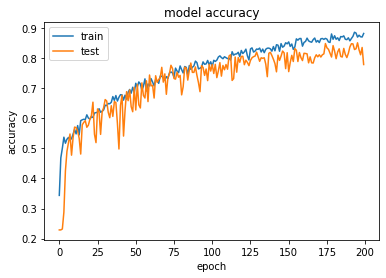

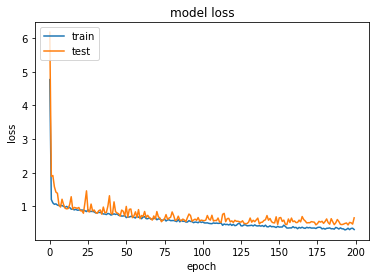

In [ ]:
# with all dropouts as original but with data aug with vartical flip

history1 = model.history.history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

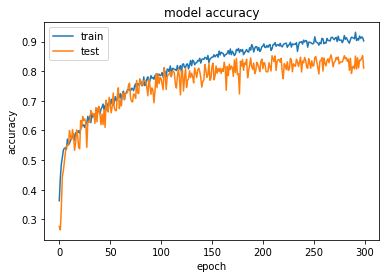

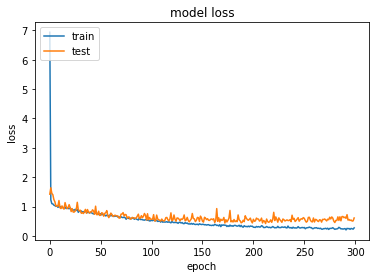

In [ ]:
# with updated dropouts ie decreased dropouts

history1 = model.history.history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

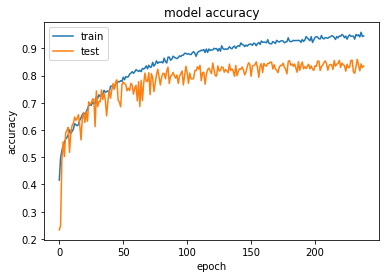

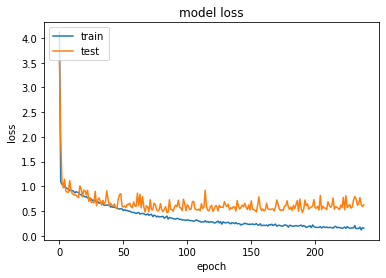

In [ ]:
#with updated dropouts : removed some dropout layers and added last dropout layer again

history1 = model.history.history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

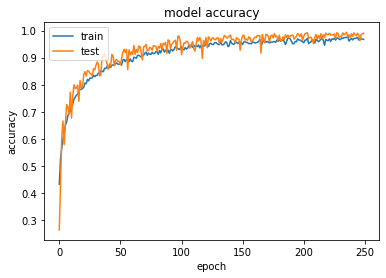

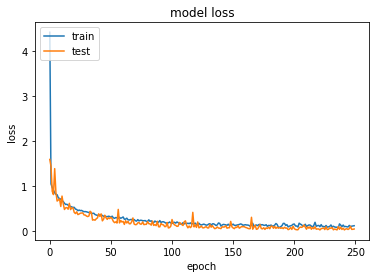

In [ ]:
#
#with prev dropouts and removed last dropout layer also in data augmentation kept 
#only horizontal flip and removed vertical flip since it was confusing model

history1 = model.history.history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!pip install h5py

In [ ]:
model.save("dress_classifier_final_weights.h5")

In [ ]:
!cp -r '/content/dress_classifier_weights.h5' '/content/drive/My Drive/test'

In [ ]:
dic = { 0 : "kurtis" ,										
1 : "saree", 										
2 : "formal", 										
3 : "Tshirt" 
}										


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model("/content/dress_classifier_weights1.h5")

predicted label: kurtis


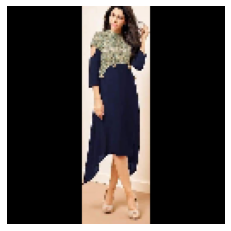

In [ ]:
image = x_test[np.random.randint(100)]
prediction = model.predict(np.expand_dims(image, axis = 0))
pred = np.argmax(prediction, axis = 1)

plt.imshow(image)
plt.axis('off')
print("predicted label:",dic[pred[0]])

In [ ]:
enc = OneHotEncoder(sparse=False)
y_test = np.reshape(y_test, (-1,1))
y_test = enc.fit_transform(y_test)

In [ ]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

300/300 [==============================] - 1s 3ms/step
[0.4820768791437149, 0.8766666650772095]


In [ ]:
# Data aug but more drops
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

300/300 [==============================] - 0s 1ms/step
[0.7045069082578024, 0.7566666603088379]


In [ ]:
# data aug but less drops

score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

300/300 [==============================] - 0s 1ms/step
[0.6029397257169088, 0.7866666913032532]


In [ ]:
# data aug with one increased drop
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

300/300 [==============================] - 0s 1ms/step
[0.6168034434318542, 0.8100000023841858]


In [ ]:
# data aug with one increased drop
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

300/300 [==============================] - 0s 2ms/step
[0.7590449682871501, 0.8233333230018616]


In [ ]:
# final
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

300/300 [==============================] - 0s 2ms/step
[0.5631141383200884, 0.9133333563804626]


In [ ]:
y_test_1 = np.argmax(y_test, axis = 1)

In [ ]:
pred = model.predict(x_test)
rounded_labels=np.argmax(pred, axis=1)


In [ ]:
result = confusion_matrix(y_test_1, rounded_labels)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_1, rounded_labels)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test_1,rounded_labels)
print("Accuracy:",result2*100)

Confusion Matrix:
[[108   5   7   0]
 [  0  50   0   3]
 [  1   1  73   7]
 [  2   0   0  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       120
           1       0.89      0.94      0.92        53
           2       0.91      0.89      0.90        82
           3       0.81      0.96      0.88        45

    accuracy                           0.91       300
   macro avg       0.90      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300

Accuracy: 91.33333333333333
